### 1. Set file path and Setup tools

In [1]:
files = 'data/DYjet/Zee_Step4_nano.root'

In [2]:
import numpy as np
import awkward as ak
from coffea.nanoaod import NanoEvents
from uproot_methods import TLorentzVectorArray
import time

### 2. JaggedArray based analysis

In [4]:
## Read events
events = NanoEvents.from_file(files)

FileNotFoundError: [Errno 2] No such file or directory: 'data/DYjet/Zee_Step4_nano.root'

In [7]:
## Read Electron
Electron = events.Electron

In [8]:
## Electron selection cut criteria ( We call it Electron cut-mask)
Electron_mask = (Electron.pt >20) & (np.abs(Electron.eta) < 2.5) & (Electron.cutBased > 1) 
Electron_mask 

<JaggedArray [[True] [True True] [True False] ... [True True] [False] [False]] at 0x0156041dc8b0>

In [9]:
Ele_Sel_mask = Electron[Electron_mask].counts > 1

In [11]:
Ele_channel_events = events[Ele_Sel_mask]

In [12]:
Ele = Ele_channel_events.Electron

In [13]:
# All possible pairs of Electron in each event
ele_pairs = Ele.distincts()

# TLorentz vector sum of ele_pairs
diele = ele_pairs.i0+ele_pairs.i1

# Choose different sign pair
diffsign_diele =  diele[diele.charge==0]

# choose maximum pt pair
leading_diffsign_diele = diffsign_diele[diffsign_diele.pt.argmax()]

In [ ]:
## For study,,, try it! and understand
#print(ele_pairs)
#print(" ")
#print(ele_pairs.i0)
#print(" ")
#print(ele_pairs.i1)
#print(" ")
#print(leading_diele.charge)

In [15]:
Mee = leading_diffsign_diele.mass.content

In [8]:
### old---------------------------------------->
## Apply Electron selection cut mask
#Sel_Electron = Electron[Electron_mask]

In [9]:
## Helper function to make Electron-array include P4 ( This code needs study )
#def make_labeled_p4(x, indices, itype):
#    p4 = TLorentzVectorArray.from_ptetaphim(x.pt, x.eta, x.phi, x.mass)
#    return ak.JaggedArray.zip(p4=p4,
#                              flavor=itype*x.pt.ones_like().astype(np.int),
#                              pidx=indices,
#                              charge=x.charge)

In [10]:
## Electron array with P4 
#sel_electrons_indices = ak.JaggedArray.fromoffsets(Sel_Electron.pt.offsets, 
#                                             np.arange(0, Sel_Electron.pt.content.size)) - Sel_Electron.pt.offsets[:-1]
#Sel_Electron_P4 =  make_labeled_p4(Sel_Electron, sel_electrons_indices, 1)

In [11]:
## Choose two electron in each events
#Sel_Electron_pair = Sel_Electron_P4.choose(2)

In [12]:
## Calculate Electron mass
#Mass_ee = (Sel_Electron_pair.i0.p4 + Sel_Electron_pair.i1.p4).mass

In [15]:
## Flatten the Jagged array to 1d array
#hist_Mass_ee = Mass_ee.content
#print(hist_Mass_ee,len(hist_Mass_ee))
#<-------------------------------------------------old

### 3. Visualization

In [16]:
import mplhep as hep
import matplotlib.pyplot as plt

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Font family ['TeX Gyre Heros'] not found. Falling back to DejaVu Sans.
findfont: Font family ['TeX Gyre Heros'] not found. Falling back to DejaVu Sans.
findfont: Font family ['TeX Gyre Heros'] not found. Falling back to DejaVu Sans.


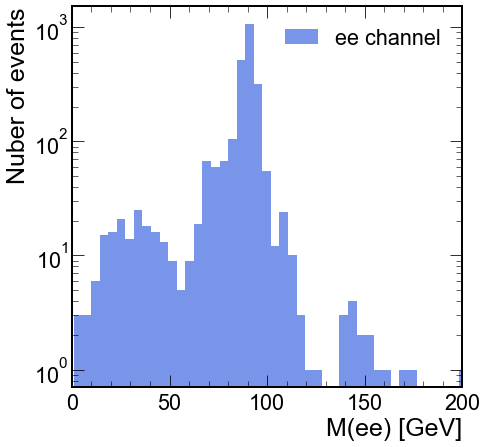

In [17]:
plt.figure(figsize=(7, 7))
plt.style.use(hep.style.CMS)
plt.hist(Mee,bins=50,color='royalblue',alpha=0.7,label='ee channel')
plt.xlim(0,200)
plt.xlabel('M(ee) [GeV]',fontsize=25)
plt.ylabel('Nuber of events',fontsize=25)
plt.yscale('log')
plt.legend()